In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mush = pd.read_csv("/home/rahemur09867/Documents/MushroomCloud/code/mushrooms.csv")
mush.head(30)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [4]:
mush.shape

(8124, 23)

In [5]:
mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


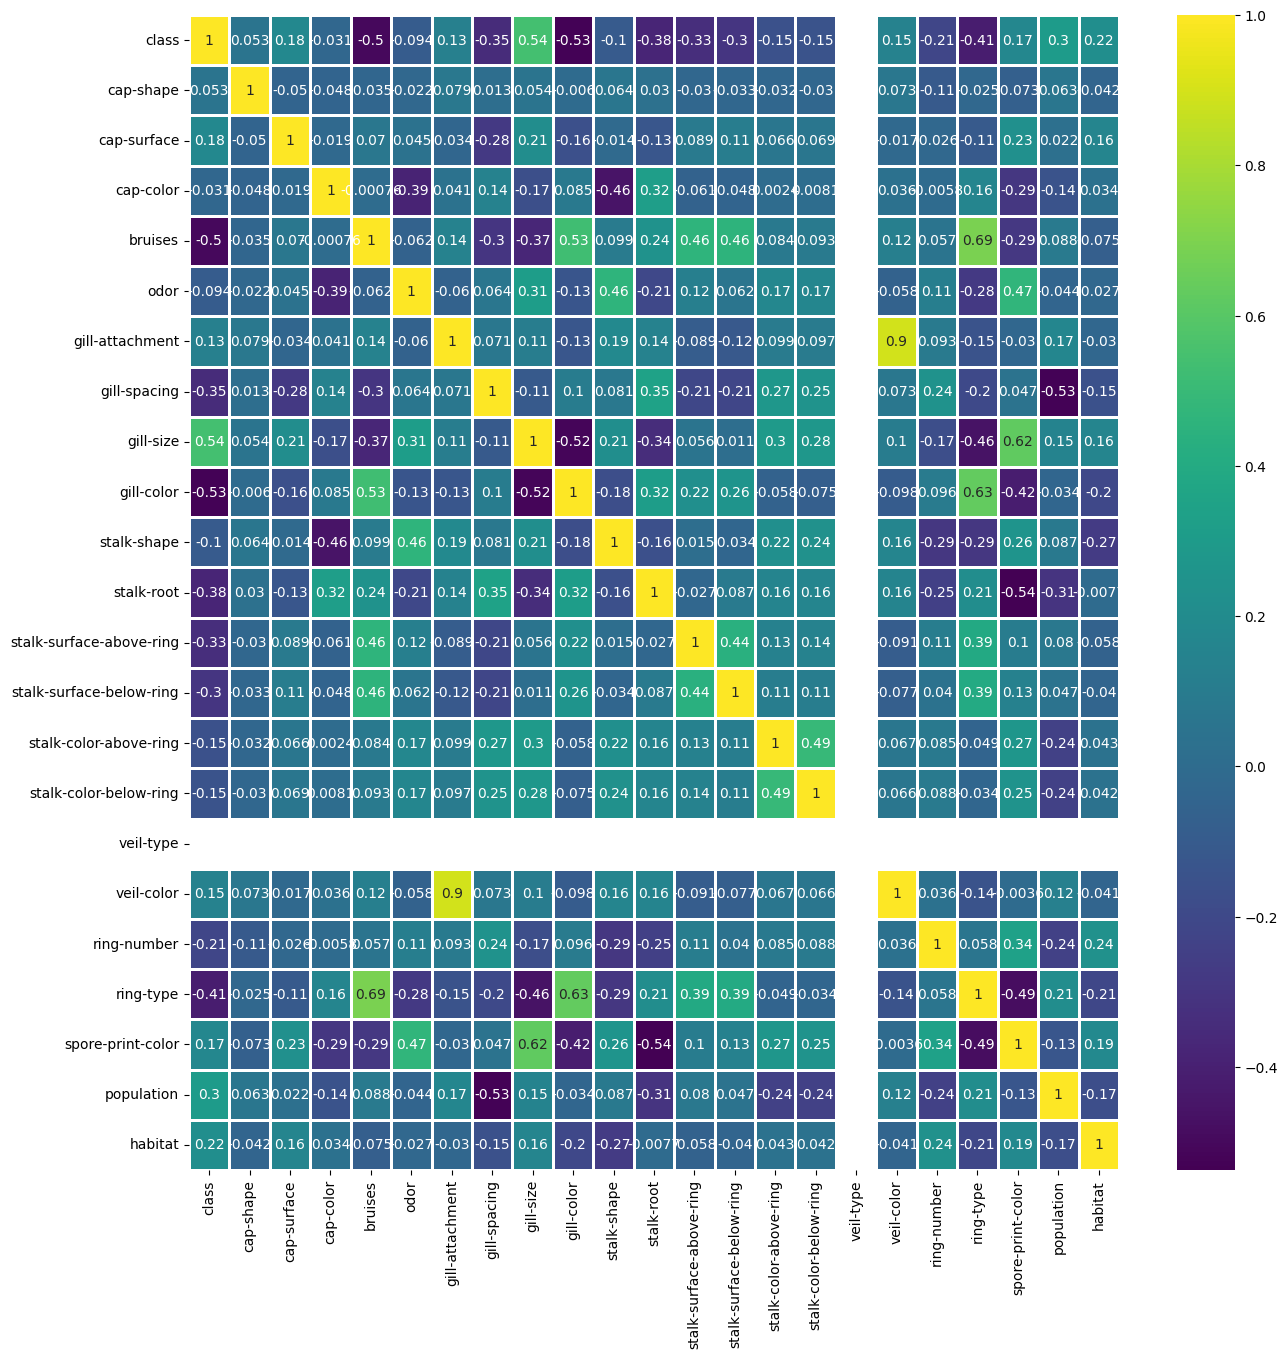

In [7]:
mush_num = mush.apply(lambda s: s.astype('category').cat.codes if s.dtype == 'object' else s)

plt.figure(figsize=(15, 15))
sns.heatmap(mush_num.corr(), annot=True, cmap='viridis', linewidths=1)
plt.show()

In [8]:
import pandas as pd
from pathlib import Path

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from joblib import dump

In [9]:
y = mush['class']
X = mush.drop(columns=['class'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


In [11]:
num_cols  = X.select_dtypes(include=['number']).columns
cat_cols  = X.select_dtypes(exclude=['number']).columns

In [12]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ],
    remainder='drop'
)

In [13]:
pca7  = PCA(n_components=7, random_state=42)
pca15 = PCA(n_components=15, random_state=42)

In [14]:
pipe7  = Pipeline([('prep', preprocess), ('pca', pca7)])
pipe15 = Pipeline([('prep', preprocess), ('pca', pca15)])

In [15]:
X_pca7  = pipe7.fit_transform(X)     # OK: fully numeric after preprocess
X_pca15 = pipe15.fit_transform(X)

In [16]:
pca = PCA(n_components=7, random_state=42)
rf  = RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

model = Pipeline([
    ('prep', preprocess),
    ('pca', pca),
    ('rf', rf),
])

In [17]:
model.fit(X_train, y_train)

# Train accuracy
train_acc = model.score(X_train, y_train) * 100

# Test accuracy
y_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred) * 100

print(f"Train Accuracy : {train_acc:.2f}%")
print(f"Test  Accuracy : {test_acc:.2f}%")


Train Accuracy : 100.00%
Test  Accuracy : 100.00%


In [18]:
SAVE_DIR = Path("/home/rahemur09867/Documents")
SAVE_DIR.mkdir(parents=True, exist_ok=True)

model_path = SAVE_DIR / "Mushroom_RF_PCA.joblib"
dump(model, model_path)

print(f"✅ Model saved at: {model_path}")


✅ Model saved at: /home/rahemur09867/Documents/Mushroom_RF_PCA.joblib


In [19]:
from joblib import load
loaded_model = load(model_path)
print("Reloaded Model Test Accuracy:", loaded_model.score(X_test, y_test) * 100, "%")

Reloaded Model Test Accuracy: 100.0 %
